In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Lista 6 - Nicholas Richers (Mestrado-PEP)
# Questão 1
## item 1
Em classe foi feita uma comparação dessas equações com o Shortest Path problem em redes de dados. Explique com suas palavras.

Em classe foi feita uma comparação dessas equações com o Shortest Path problem em redes de dados. Explique com suas palavras.

* Resp: Diferente da equação de Bellman, o problema do caminho mínimo, seja pelo algoritmo de Djkstra, onde se considera que os pesos das arestas sejam zeros ou positivos, ou por Bellman-Ford onde os pesos podem ser negativos, realizam uma busca gulosa levando em considerção um ambiente **estático**: não pode mudar enquanto o agente está realizando a solução do problema; e **determinístico**: o próximo estado do agente deve ser determinado pelo estado atual e pela ação. Mas a execução da ação não pode falhar, em outras palavras, não pode ser probabilística. 

 Em um ambiente determinístico com um único agente, a solução é um plano, sequencia ótima de ações. Quando o ambiente é estocástico, a solução é uma política (estratégia do agente), onde se especifica uma ação para cada estado.

 Na equação de Bellman considera-se uma função de recompensa, assim podemos dizer que alguns estados são mais desejáveis do que outros, pela razão do agente ao se mover nesses estados, receber uma recompensa maior. E há estados que não são interessantes, pois quando o agente se muda para lá, ele recebe uma recompensa negativa. Ações tomadas mais tarde podem ter peso menor, isso é compensado com um fator de desconto temporal, $\gamma$. Esse fator de desconto busca maximizar uma expectativa de recompensa futura, relativo ao quanto a nova experiência influência o valor já percorrido até o momento. Valores de $\gamma$ baixos dão maior peso a recompensas instantâneas, valores de $\gamma$ mais altos, se busca recompensas mais de longo prazo.

## Item 2
A partir dessas definições e equações, descreva as iterações chamadas de Value iteration, policy iteration e também o método de solucão chamado de Q-learning, explicando todos os termos/passos de cada iteraçãoo, incluindo o papel do fator de desconto γ. Você pode fazer uso de um pequeno exemplo para auxiliar a sua explicação. Seja sucinto e claro.

### Iteração de Valor
O algoritmo de iteração de valores usa programação dinâmica para determinar o **valor $V^{*}(s)$ de cada estado _s $\in$  S_ do _MDP_**, em cada época de decisão. O valor de cada estado na última época de decisão é $V_{t-1}^{*} (s) = \underset{a\in A }{\max}{R(s,a)}$, uma vez que quando só há uma decisão a ser tomada, basta escolher aquela com a maior recompensa. O algoritmo de iteração de valores pode produzir políticas não estacionárias para problemas de horizonte finito. 

A partir da equação de Bellman, inicia-se a iteração com valores arbitrários, geralmente zeros, então é calculado o utilitário de um estado. Aplicando a atualização do valor de utilidade na equação Bellman, até um determinado **critério de parada** que leve em consideração os valores utilidades entre duas iterações consecutivas, como na equação abaixo, **garante-se a convergência**. Assim, obtém-se os **valores de utilidade** de todos os estados e é possível **estimar qual é a melhor ação para cada estado**.


\begin{equation}
\label{eq:V7}
\Vert V_{t+1} - V_{t} \Vert < \epsilon \frac{1-\gamma }{\gamma }  
\end{equation}

Quando o **fator de desconto $\gamma$ se aproxima de 1, os estados futuros possuem um peso maior na política ótima** e  a convergência é mais precisa. Entretanto, no caso limite de $\gamma$ = 1, o algoritmo irá divergir. 


### ALGORITMO DE ITERAÇÃO DE POLÍTICA

Assim como o algoritmo de iteração de valor é um processo para estimar a função utilidade de cada estado, o iteração de política busca estimar a política ótima $\pi^*$ a **partir de uma política inicial arbitrária**. Como nenhuma política gera mais recompensa do que a ótima, e é garantido que a iteração de políticas converge, **busca-se por uma política que maximize a recompensa esperada**. 

Inicialmente, define-se uma política $\pi$ qualquer que atribua uma ação a cada estado. Podendo até atribuir ações aleatórias a essa política. Usando a equação de Bellman podemos calcular a utilidade esperada da política. Como se tem uma política, e a política associa a cada estado uma ação, é possível simplificar a equação de Bellman, retirando-se o operador $\max$

\begin{equation}
\label{eq:V6}
V^{*} (s) = R(s,a)+\gamma \sum_{{s}'\in S}T(s,a,{s}')V^{*}({s}')
\end{equation}

**O algoritmo faz uma busca gulosa no espaço de políticas**, no caso de **horizonte infinito (e política estacionária)**, depois de se avaliar a política é possível aprimora-lá, sendo essa a última etapa do algoritmo. **O procedimento começa com uma política aleatória, determina o valor da política atual e depois, de maneira gulosa, melhora a política buscando modificar as ações recomendadas para cada estado.**

#### AVALIAÇÃO DE POLÍTICA

É usado para melhorar uma política que não seja ótima. Sejam duas políticas estacionárias $\pi$ e $\pi ^{'}$, tais que:

$$\forall s\in S, V^{\pi}(s)\leqslant Q^{\pi} (s,\pi^{'}(s))$$

_Onde_ $V^{\pi}(s)$ _é o valor esperado de_ $\pi$ _para esse estado_ _e_ $Q^{\pi} (s,\pi^{'}(s))$ _o valor esperado para_ _s_ _usando a política_ $\pi$, _exceto que a primeira ação é dada por_ $\pi ^{'}$ _ou seja_:
$$\forall s\in S, V^{\pi}(s)\leqslant V^{\pi ^{'}}(s)$$


#### MELHORIA DE POLÍTICA

_Seja uma política_ $\pi$ para um _MDP M_ e $V^{\pi}(s)$ uma função valor associada a política $\pi$. Se $\pi$ não puder ser melhorada usando o Teoria da Melhoria de Política, ou seja, se

$$\forall s\in S, V^{*}(s)= \underset{a\in A}\max\,Q^{\pi} (s,a)$$

_então_ $\pi$ é ótima para _M_.

Para cada estado *s*, o algoritmo de iteração de políticas determina qual a melhor ação _a_ tomar, ou seja, determina uma nova política $\pi$, dado que as ações seguintes serão tomadas de acordo com $\pi^{'}$, a política definida no passo anterior


$$\forall s\in S, \, {\pi}(s) = \arg\underset{a\in A}\max\, Q^{\pi^{'}}(s,a)$$

Como a política é estacionária, $\pi$ aparece na equação como uma função de estados em ações. 

### Q-LEARNING
O algoritmo **Q-learning** permite estabelecer autonomamente uma **política de ações de maneira interativa**, o _Q-Learning_ é um **algoritmo livre de modelo e independente de política**. O agente realiza uma ação em um estado e avalia as consequências em termos da recompensa ou penalidade imediata e do valor estimado do novo estado que alcança. Ao tentar todas as ações em todos os estados, o agente aprende quais as melhores ações, baseado na recompensa de longo prazo.

A partir de $Q^{*}$ determina-se a política ótima, $\pi ^{*}(s)$= \, $\arg \underset{a}{max}\, Q^{*}(s,a)$, de forma que $V^{*}(s)$= $\underset{a}{\max}$ $Q^{*}(s,a)$. Assim, $Q^{*}(s,a)$, funciona como um estimador.

A função $Q\left ( s,a \right )$ fornece um mapeamento da forma $Q : S \times A \rightarrow V$. Q  fornece a recompensa futura e é aprendida através de tentativa e erro segundo a equação:
\begin{equation}
\label{eq:V24}
Q_{t+1}(s_{t},a_{t})= Q_{t}(s_{t},a_{t})+\alpha \left [ R_{t}+\gamma V_{t}(s_{t+1})-Q_{t}(s_{t},a_{t}) \right ] \end{equation}


**Onde $\alpha \in$ (0,1) é a taxa de aprendizado relativa ao quanto a nova experiência influência o valor já aprendido até o momento, idealmente, no início do aprendizado**, $\alpha$ deve ser maior, e após alguns experimentos, o peso da experiência pode ficar maior que o do aprendizado.


A tarefa que o agente enfrenta é a de **determinar uma política ótima, que maximize a recompensa total descontada esperada**. Por recompensa descontada, queremos dizer que as recompensas recebidas no passo anterior valem menos que as recompensas recebidas no presente, por um fator $\gamma^{s}(0<\gamma<1)$. Como já vimos, para uma política $\pi $ o valor do estado em _s_ é dado pela equação de Bellman. 

Para uma política $\pi$, define-se os valores de _Q_ (ou valores de ação), como:
$$Q^{\pi}(s,a) = R_{s}(a) + \gamma  \sum_{s'} T_{s s'}[\pi(s)] V^{\pi}(s')$$

O valor de **_Q_ é a recompensa descontada esperada para executar a ação _a_ no estado _s_ e depois a política $\pi$  a partir de então**. O objetivo no _Q-learning_ é estimar os valores _Q_ para uma política ótima.
No _Q-learning_, a experiência do agente consiste no seguinte procedimento de estágios ou episódios distintos:


1. Observar o estado atual $s_{n}$

2. Selecionar e executar uma ação $a_{n}$

3. Observar o estado subsequente $s'_{n}$

4. Receber a recompensa (ou custo) $R_{n}$

5. Ajustar os valores $Q_{n-1}$ usando um fator e aprendizagem $\alpha$, de acordo com:


\begin{equation}
\label{eq:V25}
Q_{n}(s,a)= \begin{cases}   (1-\alpha)Q_{n-1}(s,a)+\alpha_{n}[R_{n}+\gamma V_{n-1}(s')] \, ,se \,\, s=s_{n} \,\, e \,\, a=a_{n}
\\ Q_{n-1}(s,a)\, ,se \,\, s\neq s_{n} \,\, e \,\, a\neq a_{n} \end{cases}  \end{equation}
Onde, 
$$V_{n-1}(s')\equiv \underset{a'} \max {Q_{n-1}(s',a')}$$

Nos estágios iniciais de aprendizado, os valores _Q_ podem não refletir com precisão a política que eles implicitamente definem (as ações que maximizam $V_{n-1}$). Os valores iniciais de _Q_, ${Q_{0}}(s,a)$, para todos os estados e ações são assumidos. 

# Questão 2
## item 1
- Você acha que consegue resolver o problema de achar as ações que devem ser adotadas sem precisar escolher todas as combinações possíveis de ações? (Sim/não, explique).

* Resp: Sim, Uma vez que os **custos e as probabilidade de transição são estacionários**, podemos **considerar** que a política ótima é markoviana. Logo podemos modelar **o problema como um MDP**, nos livrando da tarefa de analisar todas as políticas possiveis para cada estado por análise combinatória.


## item 2
-  Caso você tenha argumentado pelo sim no item acima, mostre como determinar as ações que maximizam o lucro médio por semana, a longo prazo.

* Resp: Consideraremos esse problema para um **horizonte infinito com critério de custo Médio** _(ver Putterman pag 364)_, logo  Podemos observar que a politica ótima encontrada é semelhante encontrada no exercício anterior (G4).

In [2]:
#MDP - Value Iteration
def TM(state, action, next_state, p): ##essa funcao retorna a probabilidade P(s,s'|a)
    
    """
    Essa funcao só funciona pro caso de uma matriz 3x3x3 como é o caso desse exercício, precisamos cobrir 3 casos:
    Caso1: next_state_prob[state] = [p2, p1, p0]   ::::Quando todos os next_state são possiveis (ex:state=0, action =2)
    Caso2: next_state_prob[state] = [p2+p1, p0, 0] ::::Quando apenas os estados 0 e 1 são possíveis (ex:st=0, act =1, ou s=1, a=0)
    Caso3: next_state_prob[state] = [p2+p1+p0, 0, 0] ::::Quando apenas o estaod 0 é possivel(ex:state=0, action =0)
    """
    
    #O comportamento do nível de estoque é o inverso da demanda
    probs = p[::-1]
    
    #Os casos 2 e 3 só acontecerão caso state+action < 2
    if(state+action<states[-1]):
        
        #criando vetor de zeros: next_state_prob = [0,0,0]
        next_state_prob = [0]*len(states)
        
        #Esse loop irá somar p2+p1 (caso2) ou p2+p1+p0 (caso3) na 1a posicao de next_state_prob
        for _ in range((states[-1] - (state+action)) +1):
            next_state_prob[0] += probs.pop(0)
            
        #Se len(probs)>0, estamos no caso 2 é necessário colocar p0 na 2a posicao do vetor [p2+p1, p0, 0]
        #Se len(probs)=0. estamos no caso 3, o vetor ja está completo [p2+p1+p0, 0, 0]
        if len(probs)>0: next_state_prob[1] += probs.pop(0)
     
    
    #Caso1: next_state_prob[state] = [p2, p1, p0]
    else: next_state_prob = probs
    
    return next_state_prob[next_state]


def value_iteration(states, R, A, p):
    epsilon=0.0001
    it=0
    
    #setup inicial valores de utilidade V_{pi}=0
    U1 = dict([(s, 0) for s in states])
    Act = dict([(s, 0) for s in states])
    d_max, d_min, sp = {},{},{}


    #comeca ITV
    while True:
        it+=1
        U = U1.copy()
        delta_max, delta_min = (0,100000)
   
        for s in states:
        
            #ITV custo médio ver putterman pag 364 (ie não possui taxa de desconto)
            m = [R[s][a] + sum([TM(s, a, s1, p)* U[s1] for s1 in states]) for a in A[s]]
            U1[s] = max(m)
            
            #atualizacao de paramentros
            delta_max = max(delta_max, abs(U1[s] - U[s]))
            delta_min = min(delta_min, abs(U1[s] - U[s]))
            Act[s] = A[s][np.argmax(m)]
            
         
        #convergencia
        d_max[it] = delta_max
        d_min[it] = delta_min
        sp[it] = (delta_max - delta_min)
        if (delta_max - delta_min) < epsilon:
            
            #Se vc colocar esses prints dentro do loop irá ver a convergencia do algoritmo como na tabela do putterman
            print("iter: {} , Un({}) = {}".format(it, s, m))
            print("sp: {} , d_max: {}, d_min: {}".format(delta_max - delta_min, delta_max,delta_min))
            print("U1(s): ", U1) 
            print("\n################################\n")
        #critério de parada

            #print("ACT: ", Act)
            
            return Act 
        
     
        
states=[0,1,2] #estados
Order = [0, 15, 20] #custos de pedir para cada estado
hold=2 #custo de armazenameto
rev_unit = 60 #lucro unitário
prob_list=[0.25, 0.6, 0.15] #probalidade de vendas por estado
Actions = {0:[0,1,2], 1:[0,1], 2:[0]} #açoes permitidas por estado

#calculando as recompensas por estado reward = revenues - costs
Rewards, Costs, Revenues = {}, {}, {}
for s0 in states:   
    Revenues[s0] = [ rev_unit*(s0-s1) if(s1<s0) else 0 for s1 in states]
    Costs[s0] = [ Order[s1-s0] + (s0*hold) if(s0<s1) else (s0*hold) for s1 in states]
    Rewards[s0] = [Revenues[s0][s1] - Costs[s0][s1]   for s1 in states]

#Iteração de valor retornando a ação ótima para cada estado
Optimal_Policy  = value_iteration(states, Rewards, Actions, prob_list)
print("A ação ótima para cada estado será:\n ", Optimal_Policy)

iter: 14 , Un(2) = [580.7366313605938]
sp: 5.073658223864186e-05 , d_max: 33.555578105147674, d_min: 33.555527368565436
U1(s):  {0: 444.73663136059383, 1: 477.32921079925774, 2: 580.7366313605938}

################################

A ação ótima para cada estado será:
  {0: 2, 1: 0, 2: 0}


# Questão 3
## Item 1
Quais são os estados _s_ do modelo?
* Resp: Definimos os estados do modelo como cada par de coordenada no quadro 4x4. Ex: (1,1), (2,1), (2,3)...

## Item 2
Quais os valores de $P[s′|s,a]$ para cada par de estados _s,s′_ e para cada ação em um estado.

* Resp: Para $P[s′|s,a]$, definimos uma matrix de dimensões $(16x16x4)$, onde no exemplo abaixo a matrix de transição, do estado 0 (equivalente ao par (4,1) ou canto superior esquerdo), para cada uma das ações possíveis, podemos ver que caso o agente ande para cima ou a esquerda o agente permanecerá no estado 0, batendo na parede. Caso o agente ande para baixo ou para a direita o agente atinge o destino desejado comprobabilidade 0.7.

In [3]:
#Transition_Matrix
def return_transition(row, col, action, tot_row, tot_col):

    if(row > tot_row-1 or col > tot_col-1):
        print("ERROR: the index is out of range...")
        return None

    extended_world = np.zeros((tot_row+2, tot_col+2))

    #If the state is on the grey-obstacle it returns all zeros
    if(row == 2 and col == 1): return extended_world[1:5, 1:5]
    if(row == 0 and col == 2): return extended_world[1:5, 1:5]
    
    #If the process is on the final reward state it returns zeros
    if(row == 1 and col == 3): return extended_world[1:5, 1:5]
    
    #If the process is on the final punishment state then returns zeros
    if(row == 2 and col == 3): return extended_world[1:5, 1:5]
   

    
    if(action=="up"):
            col += 1
            row += 1
            extended_world[row-1, col] = 0.7
            extended_world[row+1, col] = 0.1#extra
            extended_world[row, col+1] = 0.1  
            extended_world[row, col-1] = 0.1           
    elif(action=="down"): 
            col += 1
            row += 1
            extended_world[row+1, col] = 0.7
            extended_world[row-1, col] = 0.1 #extra
            extended_world[row, col+1] = 0.1  
            extended_world[row, col-1] = 0.1
    elif(action=="left"):
            col += 1
            row += 1
            extended_world[row-1, col] = 0.1
            extended_world[row+1, col] = 0.1  
            extended_world[row, col-1] = 0.7
            extended_world[row, col+1] = 0.1 #extra
    elif(action=="right"):
            col += 1
            row += 1
            extended_world[row-1, col] = 0.1
            extended_world[row+1, col] = 0.1  
            extended_world[row, col+1] = 0.7
            extended_world[row, col-1] = 0.1 #extra

    #Reset the obstacle1
    if(extended_world[3, 2] != 0): extended_world[row, col] += extended_world[3, 2]
    extended_world[3, 2] = 0.0
    
    #Reset the obstacle2
    if(extended_world[1, 3] != 0): extended_world[row, col] += extended_world[1, 3]
    extended_world[1, 3] = 0.0

    
    #Control bouncing
    for row in range(0, 6):   
            if(extended_world[row, 0] != 0): extended_world[row, 1] += extended_world[row, 0]
            if(extended_world[row, 5] != 0): extended_world[row, 4] += extended_world[row, 5]
    for col in range(0, 6):
            if(extended_world[0, col] != 0): extended_world[1, col] += extended_world[0, col]
            if(extended_world[5, col] != 0): extended_world[4, col] += extended_world[5, col]

    return extended_world[1:5, 1:5]


def main():

    T = np.zeros((16, 16, 4))
    counter = 0
    for row in range(0, 4):
        for col in range(0, 4):
            line = return_transition(row, col, action="up", tot_row=4, tot_col=4)
            T[counter, : , 0] = line.flatten()
            line = return_transition(row, col, action="left", tot_row=4, tot_col=4)
            T[counter, : , 1] = line.flatten()
            line = return_transition(row, col, action="down", tot_row=4, tot_col=4)
            T[counter, : , 2] = line.flatten()
            line = return_transition(row, col, action="right", tot_row=4, tot_col=4)
            T[counter, : , 3] = line.flatten()
            counter += 1


    #print("Saving T in 'T.npy' ...")
    np.save("T", T)
    #print("Done!")
    return T

if __name__ == "__main__":
    T = main()

In [4]:
def trans_matrix(s):
    t=T[s].T
    print('Ação: {}, prob_transicao s={} => s1:  {}'.format("up",s,  t[0]))
    print('Ação: {}, prob_transicao s={} => s1:  {}'.format("left",s,  t[1]))
    print('Ação: {}, prob_transicao s={} => s1:  {}'.format("down",s,  t[2]))
    print('Ação: {}, prob_transicao s={} => s1:  {}'.format("right",s,  t[3]))
trans_matrix(0)

Ação: up, prob_transicao s=0 => s1:  [0.8 0.1 0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Ação: left, prob_transicao s=0 => s1:  [0.8 0.1 0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Ação: down, prob_transicao s=0 => s1:  [0.2 0.1 0.  0.  0.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
Ação: right, prob_transicao s=0 => s1:  [0.2 0.7 0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


## item 3
Qual a recursão que você usaria para achar os valores de $v_{\pi}(s)$?

Uma política, $\pi : S \rightarrow A$ define quais ações tomar em cada estado. A cada intervalo de tempo o sistema passa de um estado $s_{t}$ para um estado $s_{t+1}$ por intermédio de uma ação $a_{t}$ e recebe uma recompensa $r_{t}$. Ações tomadas mais tarde podem ter peso menor, isso é compensado com um fator de desconto temporal, $\gamma$. 

$$R_{t} = \sum_{k=0}^{T} \gamma ^{k}r _{t+k}$$  

A função $V_{\pi }(s)$ é definida como as **soma das recompensas** recebidas a cada ação tomada.

$$V^{\pi }(s) = E_{\pi }(R_{t}\mid s_{t} = s)$$  

A política ótima é aquela que **maximiza o valor esperado das recompensas**, através da equação: 

$$V^{*} (s) = \underset{\pi  }{\max}V^{\pi } (s) $$

Existe sempre ao menos uma política ótima $\pi∗$, que produz o valor de utilidade máximo em todos os estados $s \in S$.

O algoritmo de iteração de valores usa programação dinâmica para determinar o valor $V^{*}(s)$ de cada estado $s \in S$ do __MDP__, em cada época de decisão a partir da equação de Bellman, com o objetivo de encontrar o valor (ou utilitário) para cada estado.


\begin{equation}
\label{eq:V4}
V^{*} (s) = \underset{a  }{\max}(R(s,a)+\gamma \sum_{{s}'\in S}P(s,a,{s}')V^{*}({s}')) ,\forall s\in S      
\end{equation}


Aplicando a atualização do valor de utilidade na **equação Bellman**, até um determinado critério de parada que leve em consideração os valores utilidades entre duas iterações consecutivas, garante-se a convergência.


\begin{equation}
\Vert V_{t+1} - V_{t} \Vert < \epsilon \frac{1-\gamma }{\gamma }  
\end{equation}



## Item 4
- Mostre os valores de $v_{\pi}(s)$, de 20 em 20 passos para 200 passos. Os valores convergiram?
    *Resp: Podemos ver no gráfico abaixo que todos os estados convergiram em valores de utilidade $v_{\pi}$ bem antes de 20 passos.

gamma:  0.0
=================== OPTIMAL POLICY ==================
 ^   ^   #   v  
 ^   <   >   *  
 ^   #   ^   *  
 <   ^   <   <  

gamma:  0.8
=================== OPTIMAL POLICY ==================
 >   v   #   v  
 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  

gamma:  0.99
=================== OPTIMAL POLICY ==================
 >   v   #   v  
 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  

gamma:  1
=================== OPTIMAL POLICY ==================
 >   v   #   v  
 >   >   >   *  
 ^   #   ^   *  
 ^   >   ^   <  



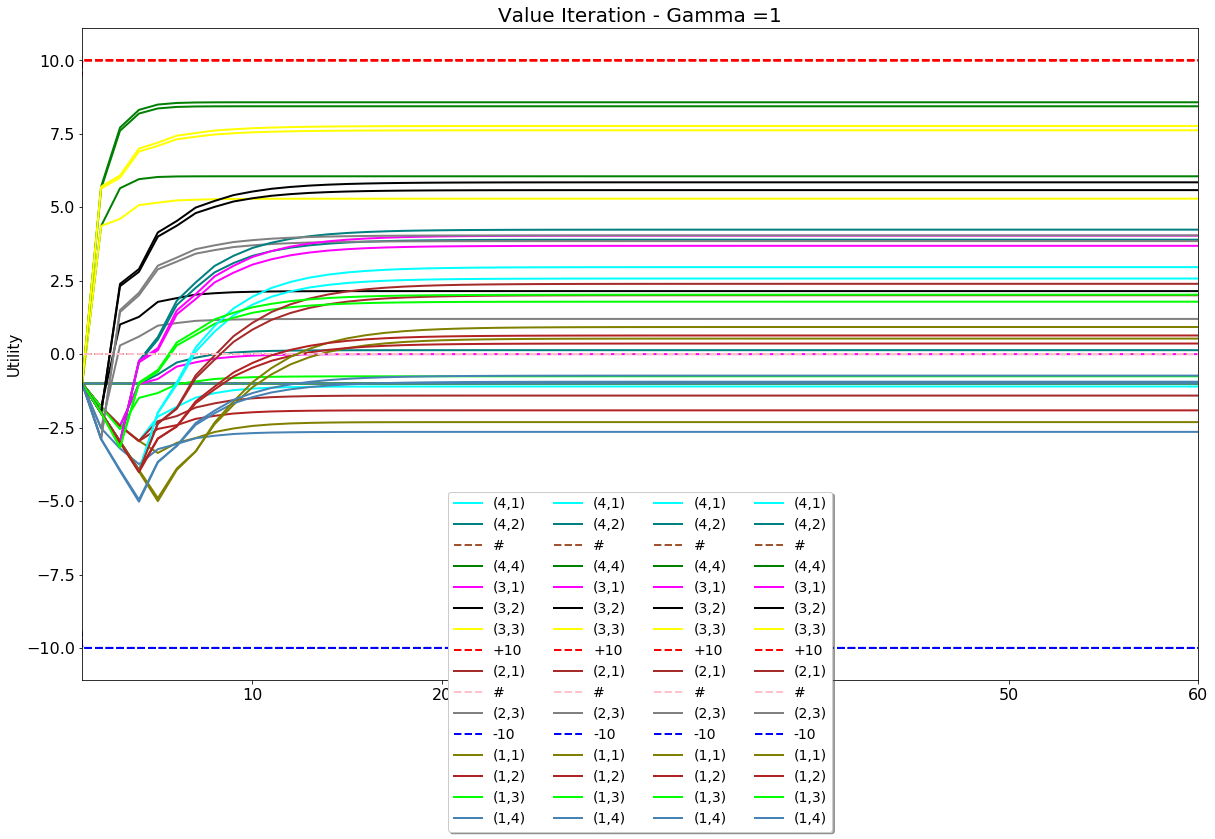

In [57]:
#Implementation of the Value Iteration algorithm
def return_state_utility(v, T, u, reward, gamma):
    """Return the utility of a single state.
    This is an implementation of the Bellman equation.
    """
    
    action_array = np.zeros(4)
    for action in range(0, 4):
        
        action_array[action] = np.sum(np.multiply(u, np.dot(v, T[:,:,action])))
        
    return reward + gamma * np.max(action_array), np.argmax(action_array)



def generate_graph(utility_list, gamma):
    """
    Given a list of utility arrays (one for each iteration) it generates a matplotlib graph
    """
    name_list = ('(4,1)', '(4,2)', '#'    , '(4,4)',     '(3,1)', '(3,2)',  '(3,3)',  '+10',   '(2,1)', '#',  '(2,3)', '-10',        '(1,1)', '(1,2)',  '(1,3)', '(1,4)')
    color_list = ('cyan' , 'teal' , 'sienna' , 'green',   'magenta', 'black', 'yellow',  'red',   'brown', 'pink', 'gray', 'blue',     'olive', 'firebrick', 'lime', 'steelblue')
    counter = 0
    index_vector = np.arange(len(utility_list))
    
    for state in range(16):
        state_list = list()
        
        for utility_array in utility_list:
             state_list.append(utility_array[state])
                
        if(state== 2 or state== 7 or state== 9 or state== 11):
            plt.plot(index_vector, state_list,'k--', color=color_list[state], label=name_list[state])
        
        else:
            plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])
        counter += 1
    
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.3), ncol=4, fancybox=True, shadow=True)
    plt.title('Value Iteration - Gamma ={}'.format(gamma))
    plt.ylim((-11.1, +11.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)




def main(gamma):
    #Change as you want
    tot_states = 16
    #gamma = 1 #Discount factor
    iteration = 0 #Iteration counter
    print_epoch =20 #number of iterations to prints

    #List containing the data for each iteation
    graph_list = list()

    #Transition matrix loaded from file (It is too big to write here)
    T = np.load("T.npy")

    #Reward vector
    r = np.array([-1.0,  -1.0,   0.0,  -1.0,
                  -1.0,  -1.0,  -1.0,    10,
                  -1.0,   0.0,  -1.0,   -10,
                  -1.0,  -1.0,  -1.0,  -1.0])   
                
    
    #r = np.array([0.0,  0.0,   0.0,  0.0,
                  #0.0,  0.0,  0.0,    10,
                  #0.0,   0.0,  0.0,   0,
                  #0.0,  0.0,  0.0,  0.0])    

    #Utility vectors
    u=np.zeros(16)
    u1=np.zeros(16)
    
    #Actions vectors
    Act=np.zeros(16)
    
    
    #main loop
    while iteration<=60:
        delta = 0.001
        u = u1.copy()
        iteration += 1
        graph_list.append(u)
        for s in range(tot_states):
            reward = r[s]
            v = np.zeros((1,tot_states))
            v[0,s] = 1.0
            u1[s], Act[s] = return_state_utility(v, T, u, reward, gamma)
            delta = max(delta, np.abs(u1[s] - u[s]))
            


    Act[7]=-1 #exit
    Act[11]=-1 #exit
    Act[2]=-2 #obstacle
    Act[9]=-2 #obstacle
    
    #create graphic
    generate_graph(graph_list, gamma)
    
    #return optimal policy
    return Act
    
if __name__ == "__main__":
    GAM = [.0, .8, .99, 1]
    #GAM = [1]
    for gamma in GAM:
        print("gamma: ", gamma)
        Act = main(gamma)
        print_policy(Act, shape=(4,4))

## item 5
Descreva como o robô determina a melhor política que deve escolher em cada estado, para otimizar o ganho?
* Resp: Uma vez que o algoritmo de iteração de valor já convergiu, a política ótima será dada pela equação abaixo, ou seja, retornará a ação com maior malor de utilidade ao dado estado _s_.

\begin{equation}
\pi^{*} (s) = \underset{a}{\arg\max}(R(s,a)+\gamma \sum_{{s}'\in S}P(s,a,{s}')V^{*}({s}')) ,\forall s\in S      
\end{equation}



In [22]:
def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    print("=================== OPTIMAL POLICY ==================")
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "            
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "           
            elif(p[counter] == 3): policy_string += " >  "
            elif(p[counter] == -2): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)


print_policy(Act, shape=(4,4))

=================== OPTIMAL POLICY ==================
 ^   ^   #   v  
 ^   ^   >   *  
 ^   #   ^   *  
 ^   ^   ^   <  

